# skin assesment analysis

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

print(tf.__version__)

2.0.0


Using TensorFlow backend.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
valid_data_dir = '/home/aditya/Downloads/dataset/skin_cancer_multi/skin-cancer/datatree/valid'
test_data_dir = '/home/aditya/Downloads/dataset/skin_cancer_multi/skin-cancer/datatree/test'
train_data_dir = '/home/aditya/Downloads/dataset/skin_cancer_multi/skin-cancer/datatree/train'

In [5]:
img_width = 70
img_height = 70
batch_size = 128

In [6]:
datagen = ImageDataGenerator(rescale = 1./255)

#### Loading  Data

In [7]:
train_generator = datagen.flow_from_directory(directory = train_data_dir,
                                              target_size = (img_width, img_height),
                                              classes = ['akiec','bcc','bkl','df','mel','nv','vasc'],
                                              class_mode = 'categorical', batch_size = batch_size)

Found 8000 images belonging to 7 classes.


In [8]:
test_generator = datagen.flow_from_directory(
    directory= test_data_dir,
    target_size=(70, 70),
    color_mode="rgb",
    batch_size=14,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 53 images belonging to 7 classes.


In [10]:
valid_generator = datagen.flow_from_directory(directory = valid_data_dir,
                                              target_size = (img_width, img_height),
                                              classes = ['akiec','bcc','bkl','df','mel','nv','vasc'],
                                              class_mode = 'categorical', batch_size = batch_size)

Found 2015 images belonging to 7 classes.


In [9]:
train_generator.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [10]:
len(train_generator)

63

In [11]:
batch_size

128

### Implementing 4 Blocks of CNN Model with Batch-Norm & Dropout

In [12]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same',
                 kernel_initializer='he_normal', input_shape = (img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))


model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7, activation = 'softmax'))

#### using model checkpoint

In [13]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:
## nothing

In [14]:
mck = ModelCheckpoint('new_model.h5', monitor='val_loss', mode='min', save_best_only=True)

In [33]:
history = model.fit_generator(generator = train_generator, steps_per_epoch = len(train_generator), epochs = 60, validation_data = valid_generator, validation_steps = len(valid_generator), verbose = 1, callbacks = [mck])

Epoch 1/60
63/63 [==============================] - 1159s 18s/step - loss: 2.3100 - accuracy: 0.2948 - val_loss: 1.9645 - val_accuracy: 0.2814
Epoch 2/60
63/63 [==============================] - 1144s 18s/step - loss: 1.5480 - accuracy: 0.5260 - val_loss: 1.6068 - val_accuracy: 0.5439
Epoch 3/60
63/63 [==============================] - 1134s 18s/step - loss: 1.2138 - accuracy: 0.6411 - val_loss: 2.7320 - val_accuracy: 0.4849
Epoch 4/60
63/63 [==============================] - 1116s 18s/step - loss: 1.0868 - accuracy: 0.6710 - val_loss: 1.2978 - val_accuracy: 0.6566
Epoch 5/60
63/63 [==============================] - 1117s 18s/step - loss: 1.0177 - accuracy: 0.6789 - val_loss: 1.0911 - val_accuracy: 0.6734
Epoch 6/60
63/63 [==============================] - 1118s 18s/step - loss: 0.9663 - accuracy: 0.6921 - val_loss: 0.9410 - val_accuracy: 0.6824
Epoch 7/60
63/63 [==============================] - 1116s 18s/step - loss: 0.9254 - accuracy: 0.6959 - val_loss: 0.9686 - val_accuracy: 0.6854

Epoch 58/60
63/63 [==============================] - 1127s 18s/step - loss: 0.4203 - accuracy: 0.8497 - val_loss: 0.8210 - val_accuracy: 0.7494
Epoch 59/60
63/63 [==============================] - 1123s 18s/step - loss: 0.4295 - accuracy: 0.8466 - val_loss: 1.1147 - val_accuracy: 0.6928
Epoch 60/60
63/63 [==============================] - 1248s 20s/step - loss: 0.4118 - accuracy: 0.8522 - val_loss: 0.7565 - val_accuracy: 0.7667


### Saving the model

In [16]:
#model.save('skin_multi.h5')

In [18]:
#len(valid_generator)*batch_size

2048

In [15]:
# Plot training & validation accuracy values
epoch_range = range(1,31)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#Plot training & validation loss values

# Plot training & validation accuracy values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()




NameError: name 'history' is not defined

In [18]:
from mlxtend.plotting import plot_confusion_matrix

In [19]:
from sklearn.metrics import confusion_matrix

In [26]:
import cv2
import os

In [41]:

from keras.preprocessing.image import img_to_array, load_img

In [7]:
# --

### Predictions

[4] [[0. 0. 0. 0. 1. 0. 0.]]


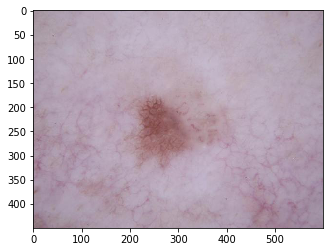

In [87]:
img = load_img('/home/aditya/Downloads/dataset/skin_cancer_multi/skin-cancer/datatree/test/bkl/16.jpg',False,target_size=(64,64))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict_classes(x)
prob = model.predict_proba(x)
print(preds, prob)


z = plt.imread('/home/aditya/Downloads/dataset/skin_cancer_multi/skin-cancer/datatree/test/bkl/16.jpg') 
plt.imshow(z); 

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
batch_normalization_24 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
dropout_24 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
batch_normalization_25 (Batc (None, 64, 64, 128)       512       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 32, 32, 128)      

In [54]:
from numpy import loadtxt
from keras.models import load_model

In [55]:
bst_model = keras.models.load_model('best_model.h5')

### Prediction #2

In [ ]:
img = load_img('/home/aditya/Downloads/dataset/skin_cancer_multi/skin-cancer/datatree/test/bkl/3.jpg',False,target_size=(64,64))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict_classes(x)
prob = model.predict_proba(x)
print(preds, prob)


z = plt.imread('/home/aditya/Downloads/dataset/skin_cancer_multi/skin-cancer/datatree/test/bkl/3.jpg') 
plt.imshow(z); 

In [14]:
bst_model = keras.models.load_model('best_model.h5')

In [41]:

from keras.preprocessing.image import img_to_array, load_img

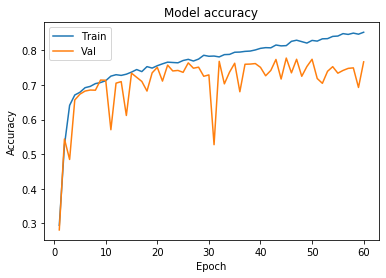

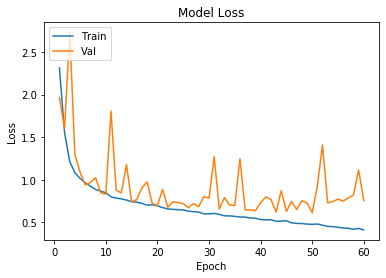

In [40]:
# Plot training & validation accuracy values
epoch_range = range(1,61)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#Plot training & validation loss values

# Plot training & validation accuracy values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()




### Predictions #3

In [16]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img

bst_model = keras.models.load_model('new_model.h5')



[1] [[0.0000000e+00 1.0000000e+00 0.0000000e+00 3.6739588e-37 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


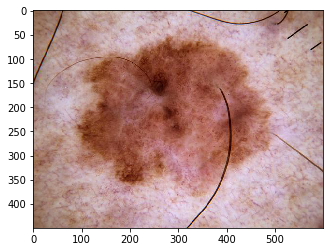

In [17]:
img = load_img('/home/aditya/Downloads/dataset/skin_cancer_multi/skin-cancer/datatree/test/mel/test.jpg',False,target_size=(70,70))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict_classes(x)
prob = model.predict_proba(x)
print(preds, prob)


z = plt.imread('/home/aditya/Downloads/dataset/skin_cancer_multi/skin-cancer/datatree/test/mel/test.jpg') 
plt.imshow(z); 

## Predict Function

In [14]:
from keras.preprocessing.image import img_to_array,load_img
import matplotlib.pyplot as plt
%matplotlib inline
def pred(img_path):    
    img = load_img(img_path,target_size = (70,70))
    x = img_to_array(img) 
    x = np.expand_dims(x,axis=0) 
    p = np.argmax(model.predict(x))
    if p==0:     
        print("actinic keratosis /Bowens disease (intraepithelial carcinoma) (AKIEC),")
    elif p==1:
        print("basal cell carcinoma (BCC)")
    elif p==2:
        print("benign keratosis (BKL)")
    elif p==3:
        print("dermatofibroma (DF)")
    elif p==4:
        print("melanoma (MEL)")
    elif p==5:
        print("melanocytic nevus (NV)")
    elif p==6:
        print("vascular lesion (VASC)")


melanocytic nevus (NV)


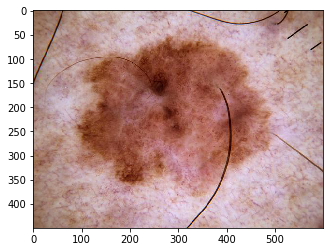

In [15]:
pred("/home/aditya/Downloads/dataset/skin_cancer_multi/skin-cancer/datatree/test/mel/test.jpg")
z = plt.imread('/home/aditya/Downloads/dataset/skin_cancer_multi/skin-cancer/datatree/test/mel/test.jpg') 
plt.imshow(z);  

In [8]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img
from flask import jsonify

def prediction(image_path):
    probability = []
    model = keras.models.load_model('new_model.h5')
    img = load_img(image_path,target_size = (70,70))
    img = img_to_array(img)
    img = np.expand_dims(img,axis=0)
    prob = model.predict_proba(img)
    p = np.argsort(model.predict_proba(img))
    for i in p:
        p = i
    for i in prob:
        prob = i
    for i in range(len(prob)):
        probability.append([prob[i],p[i]])
    probability.sort(reverse=True)   
        
    classes = {0 : 'actinic keratosis /Bowens disease (intraepithelial carcinoma) (AKIEC)',
               1 : 'basal cell carcinoma (BCC)',
               2 : "benign keratosis (BKL)",
               3 :  "dermatofibroma (DF)",
               4 :  "melanoma (MEL)",
               5 :  'melanocytic nevus (NV)',
               6 :  'vascular lesion (VASC)' }
    response = ''
    for i in probability:
        response += "The disease is: '{}' with probability = {}\n".format(classes[i[1]],i[0]))
    return jsonify(response)
prediction("/home/aditya/Downloads/dataset/skin_cancer_multi/skin-cancer/datatree/test/mel/9.jpg")
    

The disease is: 'vascular lesion (VASC)' with probability = 1.0
The disease is: 'melanocytic nevus (NV)' with probability = 0.0
The disease is: 'melanoma (MEL)' with probability = 0.0
The disease is: 'dermatofibroma (DF)' with probability = 0.0
The disease is: 'benign keratosis (BKL)' with probability = 0.0
The disease is: 'basal cell carcinoma (BCC)' with probability = 0.0
The disease is: 'actinic keratosis /Bowens disease (intraepithelial carcinoma) (AKIEC)' with probability = 0.0

